Імпортуємо залежності і датасет з циферками))

In [2]:
import keras
from keras import layers
from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

Імпортуємо тренувальний датасет цифр

In [3]:
(x_train, _), (x_test, _) = mnist.load_data() 
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11490434/11490434 [==============================] - 0s 0us/step


Виводимо розмірність датасетів

In [6]:
x_train.shape

(60000, 784)

In [7]:
x_test.shape

(10000, 784)

Створюємо модель автоенкодера

In [8]:
encoding_dim = 32

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)

encoded = layers.Dense(128, activation='relu')(encoded)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

encoder = keras.Model(input_img, encoded)
encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

Виводимо детальну інформацію про модель

In [9]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_7 (Dense)             (None, 32)                25120     
                                                                 
 dense_8 (Dense)             (None, 128)               4224      
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 784)               25872     
                                                                 
Total params: 65,552
Trainable params: 65,552
Non-trainable

Компілюємо модель

In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(
    x_train, x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/50
235/235 [==============================] - 6s 20ms/step - loss: 0.1567 - val_loss: 0.1505
Epoch 2/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1460 - val_loss: 0.1379
Epoch 3/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1349 - val_loss: 0.1294
Epoch 4/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1270 - val_loss: 0.1223
Epoch 5/50
235/235 [==============================] - 4s 17ms/step - loss: 0.1216 - val_loss: 0.1182
Epoch 6/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1188 - val_loss: 0.1165
Epoch 7/50
235/235 [==============================] - 3s 15ms/step - loss: 0.1171 - val_loss: 0.1149
Epoch 8/50
235/235 [==============================] - 5s 19ms/step - loss: 0.1158 - val_loss: 0.1138
Epoch 9/50
235/235 [==============================] - 3s 15ms/step - loss: 0.1148 - val_loss: 0.1131
Epoch 10/50
235/235 [==============================] - 3s 15ms/step - loss: 0.1136 - val_lo

Робимо передбачення

313/313 [==============================] - 0s 1ms/step


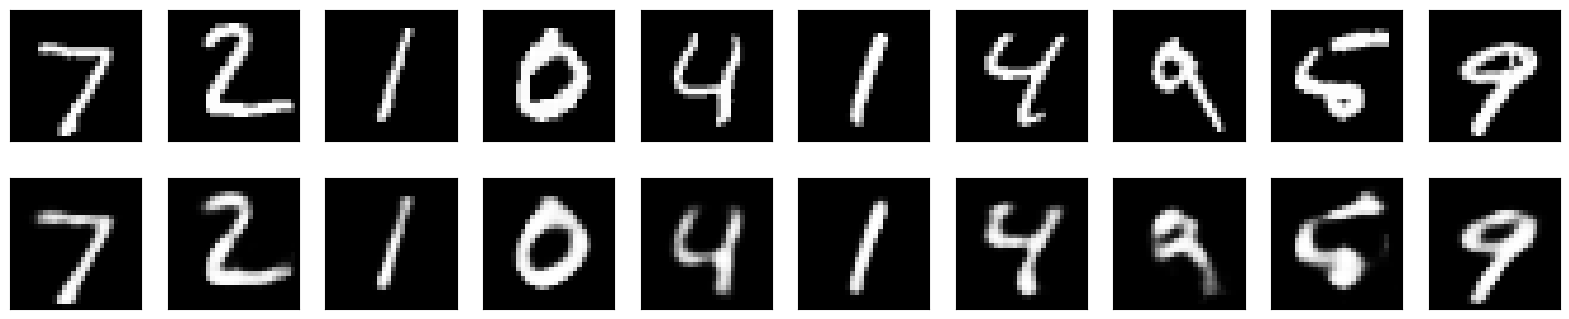

In [12]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()